In [46]:
import os
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models, callbacks, optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

label_encoder = preprocessing.LabelEncoder()

#For graph plotting
import matplotlib.pyplot as plt
import matplotlib

#For SVM model
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score

#Evaluate metrics
from sklearn.metrics import r2_score

#For ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

In [70]:
#read training data
# col_names = ["item", "state", "date", "price"]
# df = pd.read_csv('../trainer.csv', names=col_names, error_bad_lines=False)

# data = pd.read_csv('../trainer2.csv', index_col='date', parse_dates=True)
data = pd.read_csv('../trainer2.csv', parse_dates=True)

# data.set_index('date', inplace=True)
# data.index.freq='MS'
data.head()

,item,state,date,price
0,spinach,malaysia,1/1/2019,4.32
1,spinach,malaysia,2/1/2019,4.30
2,spinach,malaysia,3/1/2019,4.21
3,spinach,malaysia,4/1/2019,4.40
4,spinach,malaysia,5/1/2019,4.45


In [71]:
data['date'] = pd.to_datetime(data['date'])
data = data.groupby(['item', 'state', 'date']).sum('price')

In [72]:
data.reset_index(inplace=True)

In [73]:
data_list = []

for i in data['item'].unique():
    for n in data['state']. unique():
        data_list.append(data[(data['item'] == i) & (data['state'] == n)])


In [74]:
for i in range(len(data_list)):
    data_list[i]['Last_1_month_price'] = data_list[i]['price'].shift(1)
    data_list[i]['Last_2_month_price'] = data_list[i]['price'].shift(2)
    data_list[i]['Last_3_month_price'] = data_list[i]['price'].shift(3)

<ipython-input-74-c53f1a42cfec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_list[i]['Last_1_month_price'] = data_list[i]['price'].shift(1)
<ipython-input-74-c53f1a42cfec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_list[i]['Last_2_month_price'] = data_list[i]['price'].shift(2)
<ipython-input-74-c53f1a42cfec>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [75]:
data = pd.DataFrame()

for i in range(len(data_list)):
    data = pd.concat([data, data_list[i]])
    print(data)

          item  state       date  price  Last_1_month_price  \
0   apple fuji  johor 2019-01-01   1.64                 NaN   
1   apple fuji  johor 2019-02-01   1.61                1.64   
2   apple fuji  johor 2019-03-01   1.63                1.61   
3   apple fuji  johor 2019-04-01   1.62                1.63   
4   apple fuji  johor 2019-05-01   1.68                1.62   
5   apple fuji  johor 2019-06-01   1.72                1.68   
6   apple fuji  johor 2019-07-01   1.75                1.72   
7   apple fuji  johor 2019-08-01   1.78                1.75   
8   apple fuji  johor 2019-09-01   1.82                1.78   
9   apple fuji  johor 2019-10-01   1.83                1.82   
10  apple fuji  johor 2019-11-01   1.77                1.83   
11  apple fuji  johor 2019-12-01   1.69                1.77   
12  apple fuji  johor 2020-01-01   1.69                1.69   
13  apple fuji  johor 2020-02-01   1.68                1.69   
14  apple fuji  johor 2020-03-01   1.74                

                     item  state       date  price  Last_1_month_price  \
0              apple fuji  johor 2019-01-01   1.64                 NaN   
1              apple fuji  johor 2019-02-01   1.61                1.64   
2              apple fuji  johor 2019-03-01   1.63                1.61   
3              apple fuji  johor 2019-04-01   1.62                1.63   
4              apple fuji  johor 2019-05-01   1.68                1.62   
..                    ...    ...        ...    ...                 ...   
660  black pomfret (fish)  johor 2021-08-01  29.28               29.25   
661  black pomfret (fish)  johor 2021-09-01  28.95               29.28   
662  black pomfret (fish)  johor 2021-10-01  29.90               28.95   
663  black pomfret (fish)  johor 2021-11-01  28.86               29.90   
664  black pomfret (fish)  johor 2021-12-01  28.83               28.86   

     Last_2_month_price  Last_3_month_price  
0                   NaN                 NaN  
1                  

            item  state       date  price  Last_1_month_price  \
0     apple fuji  johor 2019-01-01   1.64                 NaN   
1     apple fuji  johor 2019-02-01   1.61                1.64   
2     apple fuji  johor 2019-03-01   1.63                1.61   
3     apple fuji  johor 2019-04-01   1.62                1.63   
4     apple fuji  johor 2019-05-01   1.68                1.62   
...          ...    ...        ...    ...                 ...   
1360     chicken  sabah 2021-08-01  10.77               10.86   
1361     chicken  sabah 2021-09-01  10.72               10.77   
1362     chicken  sabah 2021-10-01  10.64               10.72   
1363     chicken  sabah 2021-11-01  10.64               10.64   
1364     chicken  sabah 2021-12-01  10.73               10.64   

      Last_2_month_price  Last_3_month_price  
0                    NaN                 NaN  
1                    NaN                 NaN  
2                   1.64                 NaN  
3                   1.61       

            item  state       date  price  Last_1_month_price  \
0     apple fuji  johor 2019-01-01   1.64                 NaN   
1     apple fuji  johor 2019-02-01   1.61                1.64   
2     apple fuji  johor 2019-03-01   1.63                1.61   
3     apple fuji  johor 2019-04-01   1.62                1.63   
4     apple fuji  johor 2019-05-01   1.68                1.62   
...          ...    ...        ...    ...                 ...   
1955  cuttlefish  perak 2021-08-01  30.56               31.79   
1956  cuttlefish  perak 2021-09-01  31.41               30.56   
1957  cuttlefish  perak 2021-10-01  33.05               31.41   
1958  cuttlefish  perak 2021-11-01  31.39               33.05   
1959  cuttlefish  perak 2021-12-01  32.40               31.39   

      Last_2_month_price  Last_3_month_price  
0                    NaN                 NaN  
1                    NaN                 NaN  
2                   1.64                 NaN  
3                   1.61       

[2520 rows x 7 columns]
                      item     state       date  price  Last_1_month_price  \
0               apple fuji     johor 2019-01-01   1.64                 NaN   
1               apple fuji     johor 2019-02-01   1.61                1.64   
2               apple fuji     johor 2019-03-01   1.63                1.61   
3               apple fuji     johor 2019-04-01   1.62                1.63   
4               apple fuji     johor 2019-05-01   1.68                1.62   
...                    ...       ...        ...    ...                 ...   
2550  hardtail scad (fish)  malaysia 2021-08-01  10.95               10.83   
2551  hardtail scad (fish)  malaysia 2021-09-01  10.98               10.95   
2552  hardtail scad (fish)  malaysia 2021-10-01  11.12               10.98   
2553  hardtail scad (fish)  malaysia 2021-11-01  10.96               11.12   
2554  hardtail scad (fish)  malaysia 2021-12-01  11.04               10.96   

      Last_2_month_price  Last_3_month_

                item     state       date  price  Last_1_month_price  \
0         apple fuji     johor 2019-01-01   1.64                 NaN   
1         apple fuji     johor 2019-02-01   1.61                1.64   
2         apple fuji     johor 2019-03-01   1.63                1.61   
3         apple fuji     johor 2019-04-01   1.62                1.63   
4         apple fuji     johor 2019-05-01   1.68                1.62   
...              ...       ...        ...    ...                 ...   
3110  ladies fingers  selangor 2021-08-01   7.51                7.57   
3111  ladies fingers  selangor 2021-09-01   7.31                7.51   
3112  ladies fingers  selangor 2021-10-01   7.27                7.31   
3113  ladies fingers  selangor 2021-11-01   7.82                7.27   
3114  ladies fingers  selangor 2021-12-01   8.51                7.82   

      Last_2_month_price  Last_3_month_price  
0                    NaN                 NaN  
1                    NaN                 

                             item    state       date  price  \
0                      apple fuji    johor 2019-01-01   1.64   
1                      apple fuji    johor 2019-02-01   1.61   
2                      apple fuji    johor 2019-03-01   1.63   
3                      apple fuji    johor 2019-04-01   1.62   
4                      apple fuji    johor 2019-05-01   1.68   
...                           ...      ...        ...    ...   
3495  longtail tuna, black (fish)  sarawak 2021-08-01  11.54   
3496  longtail tuna, black (fish)  sarawak 2021-09-01  10.82   
3497  longtail tuna, black (fish)  sarawak 2021-10-01  10.03   
3498  longtail tuna, black (fish)  sarawak 2021-11-01  10.89   
3499  longtail tuna, black (fish)  sarawak 2021-12-01  12.48   

      Last_1_month_price  Last_2_month_price  Last_3_month_price  
0                    NaN                 NaN                 NaN  
1                   1.64                 NaN                 NaN  
2                   1.61      

            item  state       date  price  Last_1_month_price  \
0     apple fuji  johor 2019-01-01   1.64                 NaN   
1     apple fuji  johor 2019-02-01   1.61                1.64   
2     apple fuji  johor 2019-03-01   1.63                1.61   
3     apple fuji  johor 2019-04-01   1.62                1.63   
4     apple fuji  johor 2019-05-01   1.68                1.62   
...          ...    ...        ...    ...                 ...   
3880   pineapple  sabah 2021-08-01   4.27                4.43   
3881   pineapple  sabah 2021-09-01   4.43                4.27   
3882   pineapple  sabah 2021-10-01   4.71                4.43   
3883   pineapple  sabah 2021-11-01   4.86                4.71   
3884   pineapple  sabah 2021-12-01   5.06                4.86   

      Last_2_month_price  Last_3_month_price  
0                    NaN                 NaN  
1                    NaN                 NaN  
2                   1.64                 NaN  
3                   1.61       

            item     state       date  price  Last_1_month_price  \
0     apple fuji     johor 2019-01-01   1.64                 NaN   
1     apple fuji     johor 2019-02-01   1.61                1.64   
2     apple fuji     johor 2019-03-01   1.63                1.61   
3     apple fuji     johor 2019-04-01   1.62                1.63   
4     apple fuji     johor 2019-05-01   1.68                1.62   
...          ...       ...        ...    ...                 ...   
4370   red apple  selangor 2021-08-01   1.32                1.39   
4371   red apple  selangor 2021-09-01   1.45                1.32   
4372   red apple  selangor 2021-10-01   1.34                1.45   
4373   red apple  selangor 2021-11-01   1.35                1.34   
4374   red apple  selangor 2021-12-01   1.33                1.35   

      Last_2_month_price  Last_3_month_price  
0                    NaN                 NaN  
1                    NaN                 NaN  
2                   1.64                 N

               item  state       date  price  Last_1_month_price  \
0        apple fuji  johor 2019-01-01   1.64                 NaN   
1        apple fuji  johor 2019-02-01   1.61                1.64   
2        apple fuji  johor 2019-03-01   1.63                1.61   
3        apple fuji  johor 2019-04-01   1.62                1.63   
4        apple fuji  johor 2019-05-01   1.68                1.62   
...             ...    ...        ...    ...                 ...   
4825  round cabbage  johor 2021-08-01   4.70                4.87   
4826  round cabbage  johor 2021-09-01   4.71                4.70   
4827  round cabbage  johor 2021-10-01   4.67                4.71   
4828  round cabbage  johor 2021-11-01   5.41                4.67   
4829  round cabbage  johor 2021-12-01   5.94                5.41   

      Last_2_month_price  Last_3_month_price  
0                    NaN                 NaN  
1                    NaN                 NaN  
2                   1.64                 N

             item     state       date  price  Last_1_month_price  \
0      apple fuji     johor 2019-01-01   1.64                 NaN   
1      apple fuji     johor 2019-02-01   1.61                1.64   
2      apple fuji     johor 2019-03-01   1.63                1.61   
3      apple fuji     johor 2019-04-01   1.62                1.63   
4      apple fuji     johor 2019-05-01   1.68                1.62   
...           ...       ...        ...    ...                 ...   
5245  siakap fish  malaysia 2021-08-01  18.28               18.34   
5246  siakap fish  malaysia 2021-09-01  18.15               18.28   
5247  siakap fish  malaysia 2021-10-01  17.94               18.15   
5248  siakap fish  malaysia 2021-11-01  17.89               17.94   
5249  siakap fish  malaysia 2021-12-01  18.40               17.89   

      Last_2_month_price  Last_3_month_price  
0                    NaN                 NaN  
1                    NaN                 NaN  
2                   1.64      

            item    state       date  price  Last_1_month_price  \
0     apple fuji    johor 2019-01-01   1.64                 NaN   
1     apple fuji    johor 2019-02-01   1.61                1.64   
2     apple fuji    johor 2019-03-01   1.63                1.61   
3     apple fuji    johor 2019-04-01   1.62                1.63   
4     apple fuji    johor 2019-05-01   1.68                1.62   
...          ...      ...        ...    ...                 ...   
5700     spinach  sarawak 2021-08-01   6.41                6.25   
5701     spinach  sarawak 2021-09-01   6.72                6.41   
5702     spinach  sarawak 2021-10-01   6.53                6.72   
5703     spinach  sarawak 2021-11-01   6.48                6.53   
5704     spinach  sarawak 2021-12-01   6.71                6.48   

      Last_2_month_price  Last_3_month_price  
0                    NaN                 NaN  
1                    NaN                 NaN  
2                   1.64                 NaN  
3      

            item     state       date  price  Last_1_month_price  \
0     apple fuji     johor 2019-01-01   1.64                 NaN   
1     apple fuji     johor 2019-02-01   1.61                1.64   
2     apple fuji     johor 2019-03-01   1.63                1.61   
3     apple fuji     johor 2019-04-01   1.62                1.63   
4     apple fuji     johor 2019-05-01   1.68                1.62   
...          ...       ...        ...    ...                 ...   
6120    tomatoes  selangor 2021-08-01   4.98                5.31   
6121    tomatoes  selangor 2021-09-01   4.82                4.98   
6122    tomatoes  selangor 2021-10-01   4.60                4.82   
6123    tomatoes  selangor 2021-11-01   4.45                4.60   
6124    tomatoes  selangor 2021-12-01   5.11                4.45   

      Last_2_month_price  Last_3_month_price  
0                    NaN                 NaN  
1                    NaN                 NaN  
2                   1.64                 N

In [76]:
data.dropna(inplace=True)

In [77]:
data

,item,state,date,price,Last_1_month_price,Last_2_month_price,Last_3_month_price
3,apple fuji,johor,2019-04-01,1.62,1.63,1.61,1.64
4,apple fuji,johor,2019-05-01,1.68,1.62,1.63,1.61
5,apple fuji,johor,2019-06-01,1.72,1.68,1.62,1.63
6,apple fuji,johor,2019-07-01,1.75,1.72,1.68,1.62
7,apple fuji,johor,2019-08-01,1.78,1.75,1.72,1.68
...,...,...,...,...,...,...,...
6260,watermelon,selangor,2021-08-01,3.41,3.17,3.16,3.08
6261,watermelon,selangor,2021-09-01,3.18,3.41,3.17,3.16
6262,watermelon,selangor,2021-10-01,3.00,3.18,3.41,3.17
6263,watermelon,selangor,2021-11-01,3.49,3.00,3.18,3.41


In [78]:
data['item'].unique()

array(['apple fuji', 'banana', 'beef', 'black pomfret (fish)', 'carrot',
       'cauliflower', 'chicken', 'crab', 'cucumber', 'cuttlefish',
       'french bean', 'green apple', 'hardtail scad (fish)',
       'indian mackerel (fish)', 'ladies fingers', 'long beans',
       'longtail tuna, black (fish)', 'papaya', 'pineapple', 'prawn',
       'red apple', 'red chilli (kulai)', 'red snapper (fish)',
       'round cabbage', 'selayang (fish)', 'siakap fish',
       'spanish mackerel, batang (fish)', 'spinach',
       'threadfin bream (fish)', 'tomatoes', 'watermelon'], dtype=object)

In [79]:
#Label Encoding
from sklearn import preprocessing

le1 = preprocessing.LabelEncoder()
data['item']= le1.fit_transform(data['item'])

le2 = preprocessing.LabelEncoder()
data['state']= le2.fit_transform(data['state'])

data

,item,state,date,price,Last_1_month_price,Last_2_month_price,Last_3_month_price
3,0,0,2019-04-01,1.62,1.63,1.61,1.64
4,0,0,2019-05-01,1.68,1.62,1.63,1.61
5,0,0,2019-06-01,1.72,1.68,1.62,1.63
6,0,0,2019-07-01,1.75,1.72,1.68,1.62
7,0,0,2019-08-01,1.78,1.75,1.72,1.68
...,...,...,...,...,...,...,...
6260,30,5,2021-08-01,3.41,3.17,3.16,3.08
6261,30,5,2021-09-01,3.18,3.41,3.17,3.16
6262,30,5,2021-10-01,3.00,3.18,3.41,3.17
6263,30,5,2021-11-01,3.49,3.00,3.18,3.41


In [99]:
Xtraindata = data.drop(['price','date'],axis=1)
ytraindata = data['price']

In [261]:
#Test data
testdata = pd.read_csv('../tester2.csv', parse_dates=True)
testdata.head()

,item,state,date,price
0,spinach,malaysia,1/1/2022,5.72
1,spinach,malaysia,2/1/2022,5.27
2,spinach,malaysia,3/1/2022,5.63
3,spinach,malaysia,4/1/2022,5.30
4,spinach,malaysia,5/1/2022,5.66


In [262]:
testdata['date'] = pd.to_datetime(testdata['date'])
testdata = testdata.groupby(['item', 'state', 'date']).sum('price')

In [263]:
testdata.reset_index(inplace=True)

In [264]:
testdata_list = []

for i in testdata['item'].unique():
    for n in testdata['state']. unique():
        testdata_list.append(testdata[(testdata['item'] == i) & (testdata['state'] == n)])


In [265]:
for i in range(len(testdata_list)):
    testdata_list[i]['Last_1_month_price'] = testdata_list[i]['price'].shift(1)
    testdata_list[i]['Last_2_month_price'] = testdata_list[i]['price'].shift(2)
    testdata_list[i]['Last_3_month_price'] = testdata_list[i]['price'].shift(3)

<ipython-input-265-de6dca2343eb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdata_list[i]['Last_1_month_price'] = testdata_list[i]['price'].shift(1)
<ipython-input-265-de6dca2343eb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdata_list[i]['Last_2_month_price'] = testdata_list[i]['price'].shift(2)
<ipython-input-265-de6dca2343eb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [266]:
testdata = pd.DataFrame()

for i in range(len(testdata_list)):
    testdata = pd.concat([testdata, testdata_list[i]])
    print(testdata)

         item  state      date  price  Last_1_month_price  Last_2_month_price  \
0  apple fuji  johor  1/1/2022   1.82                 NaN                 NaN   
1  apple fuji  johor  2/1/2022   1.82                1.82                 NaN   
2  apple fuji  johor  3/1/2022   1.83                1.82                1.82   
3  apple fuji  johor  4/1/2022   1.82                1.83                1.82   
4  apple fuji  johor  5/1/2022   1.85                1.82                1.83   
5  apple fuji  johor  6/1/2022   1.92                1.85                1.82   
6  apple fuji  johor  7/1/2022   1.94                1.92                1.85   
7  apple fuji  johor  8/1/2022   1.96                1.94                1.92   
8  apple fuji  johor  9/1/2022   1.98                1.96                1.94   

   Last_3_month_price  
0                 NaN  
1                 NaN  
2                 NaN  
3                1.82  
4                1.82  
5                1.83  
6                1.82

[153 rows x 7 columns]
           item     state      date  price  Last_1_month_price  \
0    apple fuji     johor  1/1/2022   1.82                 NaN   
1    apple fuji     johor  2/1/2022   1.82                1.82   
2    apple fuji     johor  3/1/2022   1.83                1.82   
3    apple fuji     johor  4/1/2022   1.82                1.83   
4    apple fuji     johor  5/1/2022   1.85                1.82   
..          ...       ...       ...    ...                 ...   
157        beef  selangor  5/1/2022  38.29               38.13   
158        beef  selangor  6/1/2022  38.16               38.29   
159        beef  selangor  7/1/2022  38.36               38.16   
160        beef  selangor  8/1/2022  38.99               38.36   
161        beef  selangor  9/1/2022  38.82               38.99   

     Last_2_month_price  Last_3_month_price  
0                   NaN                 NaN  
1                   NaN                 NaN  
2                  1.82                 NaN  


            item  state      date  price  Last_1_month_price  \
0     apple fuji  johor  1/1/2022   1.82                 NaN   
1     apple fuji  johor  2/1/2022   1.82                1.82   
2     apple fuji  johor  3/1/2022   1.83                1.82   
3     apple fuji  johor  4/1/2022   1.82                1.83   
4     apple fuji  johor  5/1/2022   1.85                1.82   
..           ...    ...       ...    ...                 ...   
301  cauliflower  sabah  5/1/2022  12.94               12.04   
302  cauliflower  sabah  6/1/2022  12.65               12.94   
303  cauliflower  sabah  7/1/2022  12.62               12.65   
304  cauliflower  sabah  8/1/2022  12.32               12.62   
305  cauliflower  sabah  9/1/2022  13.12               12.32   

     Last_2_month_price  Last_3_month_price  
0                   NaN                 NaN  
1                   NaN                 NaN  
2                  1.82                 NaN  
3                  1.82                1.82  
4

[486 rows x 7 columns]
           item     state      date  price  Last_1_month_price  \
0    apple fuji     johor  1/1/2022   1.82                 NaN   
1    apple fuji     johor  2/1/2022   1.82                1.82   
2    apple fuji     johor  3/1/2022   1.83                1.82   
3    apple fuji     johor  4/1/2022   1.82                1.83   
4    apple fuji     johor  5/1/2022   1.85                1.82   
..          ...       ...       ...    ...                 ...   
490  cuttlefish  malaysia  5/1/2022  29.96               30.41   
491  cuttlefish  malaysia  6/1/2022  30.30               29.96   
492  cuttlefish  malaysia  7/1/2022  30.94               30.30   
493  cuttlefish  malaysia  8/1/2022  31.30               30.94   
494  cuttlefish  malaysia  9/1/2022  30.85               31.30   

     Last_2_month_price  Last_3_month_price  
0                   NaN                 NaN  
1                   NaN                 NaN  
2                  1.82                 NaN  


[639 rows x 7 columns]
                     item  state      date  price  Last_1_month_price  \
0              apple fuji  johor  1/1/2022   1.82                 NaN   
1              apple fuji  johor  2/1/2022   1.82                1.82   
2              apple fuji  johor  3/1/2022   1.83                1.82   
3              apple fuji  johor  4/1/2022   1.82                1.83   
4              apple fuji  johor  5/1/2022   1.85                1.82   
..                    ...    ...       ...    ...                 ...   
643  hardtail scad (fish)  johor  5/1/2022  11.30               11.29   
644  hardtail scad (fish)  johor  6/1/2022  11.71               11.30   
645  hardtail scad (fish)  johor  7/1/2022  11.43               11.71   
646  hardtail scad (fish)  johor  8/1/2022  10.91               11.43   
647  hardtail scad (fish)  johor  9/1/2022  11.03               10.91   

     Last_2_month_price  Last_3_month_price  
0                   NaN                 NaN  
1       

[792 rows x 7 columns]
               item     state      date  price  Last_1_month_price  \
0        apple fuji     johor  1/1/2022   1.82                 NaN   
1        apple fuji     johor  2/1/2022   1.82                1.82   
2        apple fuji     johor  3/1/2022   1.83                1.82   
3        apple fuji     johor  4/1/2022   1.82                1.83   
4        apple fuji     johor  5/1/2022   1.85                1.82   
..              ...       ...       ...    ...                 ...   
796  ladies fingers  selangor  5/1/2022  10.10                9.73   
797  ladies fingers  selangor  6/1/2022   9.26               10.10   
798  ladies fingers  selangor  7/1/2022   8.26                9.26   
799  ladies fingers  selangor  8/1/2022   8.35                8.26   
800  ladies fingers  selangor  9/1/2022   8.41                8.35   

     Last_2_month_price  Last_3_month_price  
0                   NaN                 NaN  
1                   NaN                 NaN 

                            item  state      date  price  Last_1_month_price  \
0                     apple fuji  johor  1/1/2022   1.82                 NaN   
1                     apple fuji  johor  2/1/2022   1.82                1.82   
2                     apple fuji  johor  3/1/2022   1.83                1.82   
3                     apple fuji  johor  4/1/2022   1.82                1.83   
4                     apple fuji  johor  5/1/2022   1.85                1.82   
..                           ...    ...       ...    ...                 ...   
886  longtail tuna, black (fish)  sabah  5/1/2022  12.25               11.94   
887  longtail tuna, black (fish)  sabah  6/1/2022  12.45               12.25   
888  longtail tuna, black (fish)  sabah  7/1/2022  13.28               12.45   
889  longtail tuna, black (fish)  sabah  8/1/2022  12.85               13.28   
890  longtail tuna, black (fish)  sabah  9/1/2022  12.67               12.85   

     Last_2_month_price  Last_3_month_p

           item     state      date  price  Last_1_month_price  \
0    apple fuji     johor  1/1/2022   1.82                 NaN   
1    apple fuji     johor  2/1/2022   1.82                1.82   
2    apple fuji     johor  3/1/2022   1.83                1.82   
3    apple fuji     johor  4/1/2022   1.82                1.83   
4    apple fuji     johor  5/1/2022   1.85                1.82   
..          ...       ...       ...    ...                 ...   
976   pineapple  malaysia  5/1/2022   3.49                3.48   
977   pineapple  malaysia  6/1/2022   3.53                3.49   
978   pineapple  malaysia  7/1/2022   3.68                3.53   
979   pineapple  malaysia  8/1/2022   3.54                3.68   
980   pineapple  malaysia  9/1/2022   3.65                3.54   

     Last_2_month_price  Last_3_month_price  
0                   NaN                 NaN  
1                   NaN                 NaN  
2                  1.82                 NaN  
3                  1.82

[1062 rows x 7 columns]
            item     state      date  price  Last_1_month_price  \
0     apple fuji     johor  1/1/2022   1.82                 NaN   
1     apple fuji     johor  2/1/2022   1.82                1.82   
2     apple fuji     johor  3/1/2022   1.83                1.82   
3     apple fuji     johor  4/1/2022   1.82                1.83   
4     apple fuji     johor  5/1/2022   1.85                1.82   
...          ...       ...       ...    ...                 ...   
1066       prawn  selangor  5/1/2022  35.05               35.71   
1067       prawn  selangor  6/1/2022  35.96               35.05   
1068       prawn  selangor  7/1/2022  36.18               35.96   
1069       prawn  selangor  8/1/2022  35.99               36.18   
1070       prawn  selangor  9/1/2022  35.99               35.99   

      Last_2_month_price  Last_3_month_price  
0                    NaN                 NaN  
1                    NaN                 NaN  
2                   1.82      

                    item  state      date  price  Last_1_month_price  \
0             apple fuji  johor  1/1/2022   1.82                 NaN   
1             apple fuji  johor  2/1/2022   1.82                1.82   
2             apple fuji  johor  3/1/2022   1.83                1.82   
3             apple fuji  johor  4/1/2022   1.82                1.83   
4             apple fuji  johor  5/1/2022   1.85                1.82   
...                  ...    ...       ...    ...                 ...   
1210  red snapper (fish)  sabah  5/1/2022  25.95               25.58   
1211  red snapper (fish)  sabah  6/1/2022  24.96               25.95   
1212  red snapper (fish)  sabah  7/1/2022  24.30               24.96   
1213  red snapper (fish)  sabah  8/1/2022  25.86               24.30   
1214  red snapper (fish)  sabah  9/1/2022  27.49               25.86   

      Last_2_month_price  Last_3_month_price  
0                    NaN                 NaN  
1                    NaN                 

[1368 rows x 7 columns]
             item    state      date  price  Last_1_month_price  \
0      apple fuji    johor  1/1/2022   1.82                 NaN   
1      apple fuji    johor  2/1/2022   1.82                1.82   
2      apple fuji    johor  3/1/2022   1.83                1.82   
3      apple fuji    johor  4/1/2022   1.82                1.83   
4      apple fuji    johor  5/1/2022   1.85                1.82   
...           ...      ...       ...    ...                 ...   
1372  siakap fish  sarawak  5/1/2022  22.22               21.62   
1373  siakap fish  sarawak  6/1/2022  22.71               22.22   
1374  siakap fish  sarawak  7/1/2022  22.36               22.71   
1375  siakap fish  sarawak  8/1/2022  23.66               22.36   
1376  siakap fish  sarawak  9/1/2022  23.62               23.66   

      Last_2_month_price  Last_3_month_price  
0                    NaN                 NaN  
1                    NaN                 NaN  
2                   1.82      

                        item  state      date  price  Last_1_month_price  \
0                 apple fuji  johor  1/1/2022   1.82                 NaN   
1                 apple fuji  johor  2/1/2022   1.82                1.82   
2                 apple fuji  johor  3/1/2022   1.83                1.82   
3                 apple fuji  johor  4/1/2022   1.82                1.83   
4                 apple fuji  johor  5/1/2022   1.85                1.82   
...                      ...    ...       ...    ...                 ...   
1498  threadfin bream (fish)  perak  5/1/2022  14.80               14.62   
1499  threadfin bream (fish)  perak  6/1/2022  15.65               14.80   
1500  threadfin bream (fish)  perak  7/1/2022  15.79               15.65   
1501  threadfin bream (fish)  perak  8/1/2022  15.52               15.79   
1502  threadfin bream (fish)  perak  9/1/2022  15.61               15.52   

      Last_2_month_price  Last_3_month_price  
0                    NaN                

In [267]:
testdata.dropna(inplace=True)

In [268]:
testdata

,item,state,date,price,Last_1_month_price,Last_2_month_price,Last_3_month_price
3,apple fuji,johor,4/1/2022,1.82,1.83,1.82,1.82
4,apple fuji,johor,5/1/2022,1.85,1.82,1.83,1.82
5,apple fuji,johor,6/1/2022,1.92,1.85,1.82,1.83
6,apple fuji,johor,7/1/2022,1.94,1.92,1.85,1.82
7,apple fuji,johor,8/1/2022,1.96,1.94,1.92,1.85
...,...,...,...,...,...,...,...
1606,watermelon,selangor,5/1/2022,4.06,3.91,3.29,3.50
1607,watermelon,selangor,6/1/2022,3.97,4.06,3.91,3.29
1608,watermelon,selangor,7/1/2022,3.95,3.97,4.06,3.91
1609,watermelon,selangor,8/1/2022,3.93,3.95,3.97,4.06


In [269]:
dffilter = testdata.copy()
testdata['item']= le1.fit_transform(testdata['item'])
testdata['state']= le2.fit_transform(testdata['state'])
testdata

,item,state,date,price,Last_1_month_price,Last_2_month_price,Last_3_month_price
3,0,0,4/1/2022,1.82,1.83,1.82,1.82
4,0,0,5/1/2022,1.85,1.82,1.83,1.82
5,0,0,6/1/2022,1.92,1.85,1.82,1.83
6,0,0,7/1/2022,1.94,1.92,1.85,1.82
7,0,0,8/1/2022,1.96,1.94,1.92,1.85
...,...,...,...,...,...,...,...
1606,30,5,5/1/2022,4.06,3.91,3.29,3.50
1607,30,5,6/1/2022,3.97,4.06,3.91,3.29
1608,30,5,7/1/2022,3.95,3.97,4.06,3.91
1609,30,5,8/1/2022,3.93,3.95,3.97,4.06


In [256]:
Xtestdata = testdata.drop(['price','date'],axis=1)
ytestdata = testdata['price']

In [105]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def calculate_error_measures(X, Y):
    
    """
    Function to calculate the mean squared error, mean absolute error and the coefficient of determination (r2) between two lists.
    ...
    Attributes
    ----------
    X : list
    
    Y : list
    
    """
    
        
    MSE = mean_squared_error(X, Y)
    print('Mean Squared Error: ', MSE)
    
    MAE = mean_absolute_error(X, Y)
    print('Mean Absolute Error: ', MAE)
        
    error_measures = [MSE, MAE]
    return error_measures

# SVM

In [101]:
from sklearn.model_selection import RandomizedSearchCV

regressor = SVR(kernel = 'rbf')
svmtrainpredict = regressor.fit(Xtraindata, ytraindata)

In [102]:
y_pred = regressor.predict(Xtestdata)

In [179]:
Xtestdata

,item,state,Last_1_month_price,Last_2_month_price,Last_3_month_price
3,0,0,1.83,1.82,1.82
4,0,0,1.82,1.83,1.82
5,0,0,1.85,1.82,1.83
6,0,0,1.92,1.85,1.82
7,0,0,1.94,1.92,1.85
...,...,...,...,...,...
1606,30,5,3.91,3.29,3.50
1607,30,5,4.06,3.91,3.29
1608,30,5,3.97,4.06,3.91
1609,30,5,3.95,3.97,4.06


In [185]:
regressor.predict(np.array([0, 0, 1.2, 1.4, 1.8]).reshape(1, -1))

array([1.61561303])

In [103]:
r2_score(ytestdata, y_pred)

0.9803706577139205

In [106]:
print("Error measures for SVM:")
calculate_error_measures(ytestdata, y_pred)

Error measures for SVM:
Mean Squared Error:  2.6787803450847707
Mean Absolute Error:  0.5291165663506543


[2.6787803450847707, 0.5291165663506543]

# Hybrid ARIMA-ANN

In [107]:
hybridytraindata = data['price']
hybridytestdata = testdata['price']

hybridXtraindata = Xtraindata
hybridXtestdata = Xtestdata

# Check for stationarity for time series

C:\Users\User\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


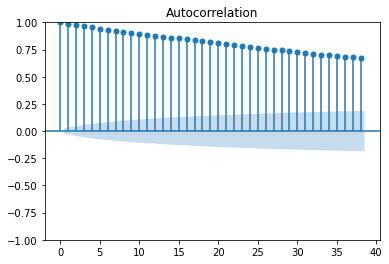

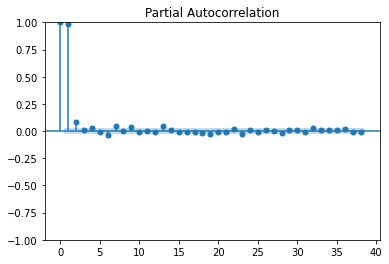

In [108]:
#ACF and PACF plots
acf_original = plot_acf(hybridytraindata)
pacf_original = plot_pacf(hybridytraindata)

In [109]:
adf_test = adfuller(hybridytraindata)
print(f'p-value: {adf_test[1]}')

p-value: 2.1622333942057418e-05


<AxesSubplot:>

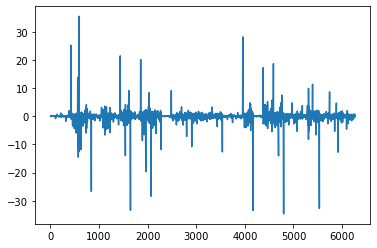

In [110]:
#Use differencing to transform to stationary (actually remove correlation)
hybridytraindatadiff = hybridytraindata.diff().dropna()
hybridytraindatadiff.plot()

C:\Users\User\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


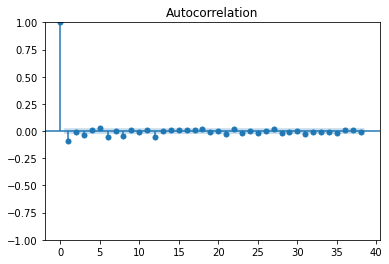

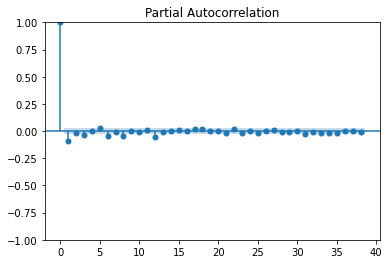

In [111]:
#ACF and PACF plots after transform the data to stationary data
acf_original = plot_acf(hybridytraindatadiff)
pacf_original = plot_pacf(hybridytraindatadiff)

In [112]:
adf_test = adfuller(hybridytraindatadiff)
print(f'p-value: {adf_test[1]}')

p-value: 0.0


In [113]:
hybridytraindata

3       1.62
4       1.68
5       1.72
6       1.75
7       1.78
        ... 
6260    3.41
6261    3.18
6262    3.00
6263    3.49
6264    4.20
Name: price, Length: 5728, dtype: float64

In [114]:
arimamodel = ARIMA(hybridytraindata, order=(2,1,0))
arimatrainhistory = arimamodel.fit()
print(arimatrainhistory.summary())

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                 5728
Model:                 ARIMA(2, 1, 0)   Log Likelihood              -11235.924
Date:                Wed, 07 Dec 2022   AIC                          22477.848
Time:                        16:44:19   BIC                          22497.807
Sample:                             0   HQIC                         22484.795
                               - 5728                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0917      0.007    -14.028      0.000      -0.105      -0.079
ar.L2         -0.0171      0.006     -2.904      0.004      -0.029      -0.006
sigma2         2.9623      0.006    509.778      0.0

<Figure size 1152x576 with 0 Axes>

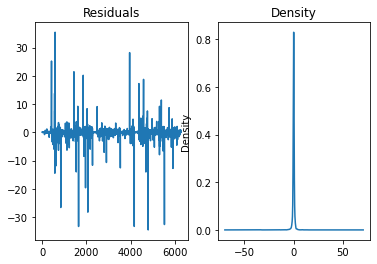

In [115]:
residuals = arimatrainhistory.resid[1:]
plt.figure(figsize=(16, 8))
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

C:\Users\User\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


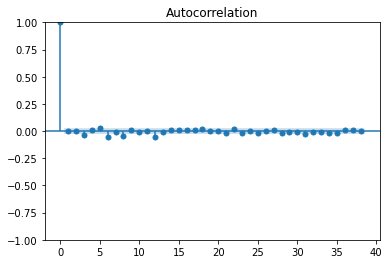

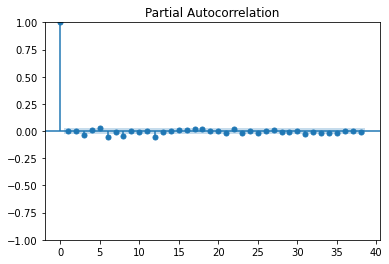

In [116]:
acf_original = plot_acf(residuals)
pacf_original = plot_pacf(residuals)

In [120]:
len(arimatesthistory)

1074

In [117]:
mergeframe = [data, testdata]
  
mergeframe = pd.concat(mergeframe)

mergeframe

,item,state,date,price,Last_1_month_price,Last_2_month_price,Last_3_month_price
3,0,0,2022-04-01 00:00:00,1.62,1.63,1.61,1.64
4,0,0,2022-05-01 00:00:00,1.68,1.62,1.63,1.61
5,0,0,2022-06-01 00:00:00,1.72,1.68,1.62,1.63
6,0,0,2022-07-01 00:00:00,1.75,1.72,1.68,1.62
7,0,0,2022-08-01 00:00:00,1.78,1.75,1.72,1.68
...,...,...,...,...,...,...,...
1606,30,5,5/1/2022,4.06,3.91,3.29,3.50
1607,30,5,6/1/2022,3.97,4.06,3.91,3.29
1608,30,5,7/1/2022,3.95,3.97,4.06,3.91
1609,30,5,8/1/2022,3.93,3.95,3.97,4.06


C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<AxesSubplot:>

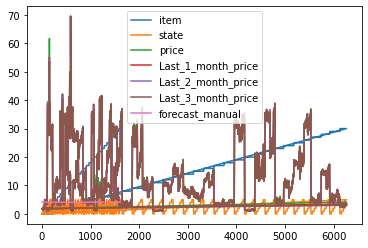

In [119]:
# arimatesthistory = arimatrainhistory.forecast(len(hybridytestdata))
# mergeframe['forecast_manual']=[None]*len(hybridytraindata) + list(arimatesthistory)
# mergeframe.plot()

arimatesthistory = arimatrainhistory.forecast(len(hybridytestdata))
mergeframe['forecast_manual']=[None]*len(hybridytraindata) + list(arimatesthistory)
mergeframe.plot()

In [121]:
arimatesthistory = arimatrainhistory.forecast(len(hybridytestdata))
mergeframe['forecast_manual']=[None]*len(hybridytraindata) + list(arimatesthistory)

# #here need edit
# h1 = mergeframe[(mergeframe['item']==2.0) & (mergeframe['state']==1.0)]
# plt.plot(h1['date'], h1['price'], color='blue', label='spinach')
# plt.plot(h1['date'], h1['forecast_manual'], color='orange', label='spinach')

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [122]:
from pmdarima.arima import auto_arima

In [123]:
auto_arima = auto_arima(hybridytraindata, stepwise=False, seasonal=False)
auto_arima

ARIMA(order=(3, 1, 2), scoring_args={}, suppress_warnings=True)

In [124]:
#calculate rmse
from math import sqrt
from sklearn.metrics import mean_squared_error

rms = sqrt(mean_squared_error(hybridytestdata,arimatesthistory))
print(rms)

15.30195817683461


In [125]:
arimamodel2 = ARIMA(hybridytraindata, order=auto_arima.order)  
arimatrainhistory2 = arimamodel2.fit()
print(arimatrainhistory2.summary())

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                 5728
Model:                 ARIMA(3, 1, 2)   Log Likelihood              -11227.502
Date:                Wed, 07 Dec 2022   AIC                          22467.004
Time:                        16:46:27   BIC                          22506.922
Sample:                             0   HQIC                         22480.899
                               - 5728                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2372      0.097      2.450      0.014       0.047       0.427
ar.L2         -0.7835      0.079     -9.935      0.000      -0.938      -0.629
ar.L3         -0.0945      0.010     -9.738      0.0

In [126]:
arimatesthistory2 = arimatrainhistory2.forecast(len(hybridytestdata))
mergeframe['forecast_manual']=[None]*len(hybridytraindata) + list(arimatesthistory2)

# #need edit
# h1 = mergeframe[(mergeframe['item']==2.0) & (mergeframe['state']==1.0)]
# plt.plot(h1['date'], h1['price'], color='blue', label='actual data')
# plt.plot(h1['date'], h1['forecast_manual'], color='orange', label='predict data')
# plt.legend()

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<Figure size 1152x576 with 0 Axes>

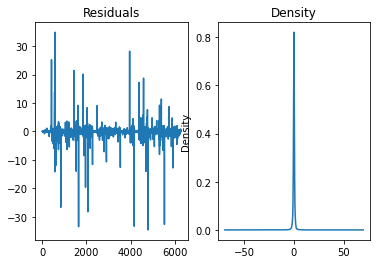

In [127]:
residuals = arimatrainhistory2.resid[1:]
plt.figure(figsize=(16, 8))
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

C:\Users\User\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


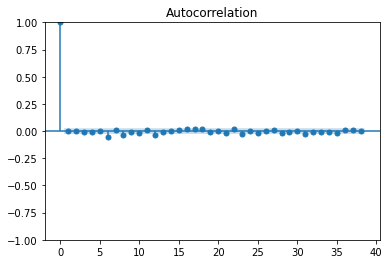

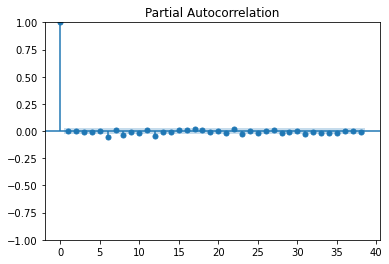

In [128]:
acf_original = plot_acf(residuals)
pacf_original = plot_pacf(residuals)

In [129]:
rms = sqrt(mean_squared_error(hybridytestdata,arimatesthistory2))
print(rms)

15.313989265862999


In [132]:
hybridytestdata

3       1.82
4       1.85
5       1.92
6       1.94
7       1.96
        ... 
1606    4.06
1607    3.97
1608    3.95
1609    3.93
1610    4.01
Name: price, Length: 1074, dtype: float64

In [137]:
fc = arimatrainhistory2.forecast(len(hybridytestdata), alpha=0.10)

residuals = [a-b for a,b in zip(hybridytestdata, fc)]

hybridresiduals = pd.DataFrame(residuals, columns = ['resid'])

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [139]:
from statsmodels.tsa import stattools

def find_input_dim(data):
    
    """
    Function to find the number of terms above 0.9 autocorrelation in a data set.
    ...
    Attributes
    ----------
    data : list, Dataframe
    
    """
    
    acf_djia, confint_djia, qstat_djia, pvalues_djia = stattools.acf(data,
                                                                 adjusted=True,
                                                                 nlags=500,
                                                                 qstat=True,
                                                                 fft=True,
                                                                 alpha = 0.05)
    
    plt.figure(figsize=(7, 5))
    plt.plot(pd.Series(acf_djia), color='r', linewidth=2)
    plt.title('Autocorrelation of Price', weight='bold', fontsize=16)
    plt.xlabel('Lag', weight='bold', fontsize=14)
    plt.ylabel('Value', weight='bold', fontsize=14)
    plt.xticks(weight='bold', fontsize=12, rotation=45)
    plt.yticks(weight='bold', fontsize=12)
    plt.grid(True)
    
    input_dim = sum([1 for x in acf_djia if x>0.9])
    print("Number of values above 0.9 autocorrelation is: ", input_dim)
    return input_dim

Number of values above 0.9 autocorrelation is:  3


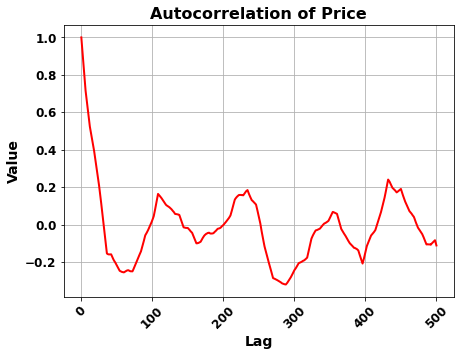

In [140]:
input_dim_hybrid = find_input_dim(hybridresiduals['resid'])

In [141]:
def create_regressor_attributes(df, attribute, list_of_prev_t_instants) :
    list_of_prev_t_instants.sort()
    start = list_of_prev_t_instants[-1] 
    end = len(df)
    df['datetime'] = df.index
    df.reset_index(drop=True)

    df_copy = df[start:end]
    df_copy.reset_index(inplace=True, drop=True)

    for attribute in attribute :
            foobar = pd.DataFrame()

            for prev_t in list_of_prev_t_instants :
                new_col = pd.DataFrame(df[attribute].iloc[(start - prev_t) : (end - prev_t)])
                new_col.reset_index(drop=True, inplace=True)
                new_col.rename(columns={attribute : '{}_(t-{})'.format(attribute, prev_t)}, inplace=True)
                foobar = pd.concat([foobar, new_col], sort=False, axis=1)

            df_copy = pd.concat([df_copy, foobar], sort=False, axis=1)
            
    df_copy.set_index(['datetime'], drop=True, inplace=True)
    return df_copy

In [142]:
column_hybrid = ['resid']

n_lags_hybrid = []
for i in range(1, input_dim_hybrid+1):
    n_lags_hybrid.append(i)

df_new_hybrid = create_regressor_attributes(hybridresiduals, column_hybrid, n_lags_hybrid)

In [149]:
def forecast_HMLP_residuals(input_dim_hybrid, X_train, y_train, X_test, y_test):
    
    """
    Function to build the HMLP and forecast the residuals.
    ...
    Attributes
    ----------
    input_dim_hybrid: int
        Dimension of the input layer for the HMLP.
    X_train: list
    y_train: list
    X_valid: list
    y_valid: list
    X_test: list
    
    """
    #
    ## define model
    model = Sequential()
    model.add(Dense(input_dim_hybrid, activation='tanh', input_dim=(5)))
    model.add(Dense(input_dim_hybrid/2, activation='tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(1, activation='linear'))
    model.compile(
            optimizer=Adam(learning_rate=0.0001),
            loss="mean_squared_error",
            metrics=["mse", "mae"])
    
    model.summary()
    
    history_hybrid = model.fit(X_train, y_train,
                               validation_data=(X_test, y_test),
                               batch_size=32,
                               epochs=100, verbose=False)
    
    pred_HMLP = model.predict(X_test)
    #input_dim_hybrid
    
    return pred_HMLP, history_hybrid

In [144]:
input_dim_hybrid

3

In [150]:
from keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

resid_HMLP, history_hybrid = forecast_HMLP_residuals(
    input_dim_hybrid, hybridXtraindata, hybridytraindata, hybridXtestdata, hybridytestdata)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 3)                 18        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 4         
_________________________________________________________________
dropout_2 (Dropout)          (None, 1)                 0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 2         
Total params: 24
Trainable params: 24
Non-trainable params: 0
_________________________________________________________________


In [151]:
def zero_centre(prediction):
    
    """
    Function to zero center the hybrid prediction.
    ...
    Attributes
    ----------
    prediction : list
    
    """
    
    if prediction[0] < 0:
        prediction = [abs(prediction[0])+i for i in prediction]
    if prediction[0] > 0:
        prediction = [i-prediction[0] for i in prediction]
    else:
        return prediction
    return prediction

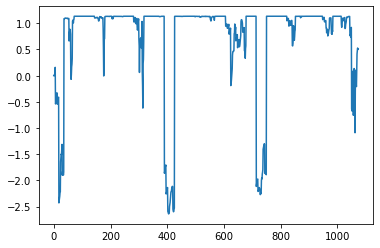

In [152]:
resid_HMLP = zero_centre(resid_HMLP)

plt.plot(resid_HMLP)
plt.show()

In [153]:
#List comprehension to combine ARIMA and HMLP forecast.
pred_hybrid = [a+b for a,b in zip(fc, resid_HMLP)]

In [154]:
print("Error measures for Hybrid:")
calculate_error_measures(ytestdata, pred_hybrid)

Error measures for Hybrid:
Mean Squared Error:  211.9128198301712
Mean Absolute Error:  9.510677362136557


[211.9128198301712, 9.510677362136557]

# ANN

In [155]:
from keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

def get_mlp_model(input_dim, hidden_layer_one=50, hidden_layer_two=25,
    dropout=0.2, learn_rate=0.01):
    
    """
    Function to build the MLP model. The parameters of the model will be optimised by the optimize_parameters() function.
    ...
    Attributes
    ----------
    input_dim: int
        Dimension of the input layer.
    hidden_layer_one: int
        Size of the first hidden layer. Default value = 50.
    hidden_layer_two: int
        Size of the second hidden layer. Default value = 25.
    dropout: float
        Rate of dropout of the dropout layer. Default value = 0.2.
    learn_rate: float
        Amount of learning rate. Default value = 0.01.
        
    """
    
    # initialize a sequential model and add layer to flatten the
    # input data
    model = Sequential()
    #model.add(Flatten())
    
    model.add(Dense(hidden_layer_one, activation="relu",
        input_dim=input_dim))
    model.add(Dropout(dropout))
    model.add(Dense(hidden_layer_two, activation="relu"))
    model.add(Dropout(dropout))
    model.add(Dense(1, activation='linear'))
    # compile the model
    model.compile(
        optimizer=Adam(learning_rate=learn_rate),
        loss="mean_squared_error",
        metrics=["mse", "mae"])
    # return compiled model
    return model

In [156]:
from sklearn.model_selection import TimeSeriesSplit

def optimize_parameters(model, grid, X_train, y_train):
    
    """
    Function to optimise the MLP hyperparameters using RandomizedSearchCV. 
    ...
    Attributes
    ----------
    model: KerasRegressor object
        The model to be optimised. Wrapped in a KerasRegressor object for compatibility with the sklearn library.
    grid: dictionary
        Dictionary of list with the hyperparameter values used for optimisation.
    X_train: list
    y_train: list
        
    """
    
    tss = TimeSeriesSplit(n_splits=10)
    
    
    print("[INFO] performing random search...")
    searcher = RandomizedSearchCV(estimator=model, n_jobs=-1, n_iter=10, cv=tss,
        param_distributions=grid, scoring=('neg_mean_squared_error','neg_mean_absolute_error'), refit='neg_mean_squared_error')
    search_results = searcher.fit(X_train, y_train)
    best_params = search_results.best_params_
    print("Best parameters are: {}".format(best_params))
    
    return best_params


Number of values above 0.9 autocorrelation is:  10


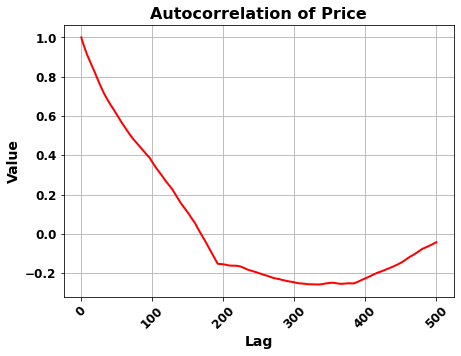

In [161]:
input_dim = find_input_dim(ytraindata)

In [163]:
from keras.wrappers.scikit_learn import KerasRegressor

#wrap model into a scikit-learn compatible regressor
model = KerasRegressor(build_fn=get_mlp_model, verbose=0, input_dim=5)

#define the grid of the hyperparameter search space
hidden_layer_one = [25,50,100]
hidden_layer_two = [5,10,25]
learn_rate = [0.01,0.001,0.0001]
dropout = [0.1,0.2,0.3,0.4,0.5]
batch_size = [4,8,16,32,64,128]
epochs = [10,50,100,500,1000]

#create a dictionary from the hyperparameter grid
grid=dict(
hidden_layer_one = hidden_layer_one,
hidden_layer_two = hidden_layer_two,
learn_rate = learn_rate,
dropout = dropout,
batch_size = batch_size,
epochs = epochs
)

In [159]:
Xtraindata

,item,state,Last_1_month_price,Last_2_month_price,Last_3_month_price
3,0,0,1.63,1.61,1.64
4,0,0,1.62,1.63,1.61
5,0,0,1.68,1.62,1.63
6,0,0,1.72,1.68,1.62
7,0,0,1.75,1.72,1.68
...,...,...,...,...,...
6260,30,5,3.17,3.16,3.08
6261,30,5,3.41,3.17,3.16
6262,30,5,3.18,3.41,3.17
6263,30,5,3.00,3.18,3.41


# CAREFULLLLL!!!!!

# CAREFULLLLL!!!!!

# CAREFULLLLL!!!!!

In [164]:
#careful cnt run!!!!!
from tensorflow.keras.models import save_model

best_parameters = optimize_parameters(model, grid, Xtraindata, ytraindata)

hidden_layer_one = best_parameters['hidden_layer_one']
hidden_layer_two = best_parameters['hidden_layer_two']
learn_rate = best_parameters['learn_rate']
dropout = best_parameters['dropout']
batch_size = best_parameters['batch_size']
epochs = best_parameters['epochs']

best_model = get_mlp_model(5, hidden_layer_one = hidden_layer_one, hidden_layer_two = hidden_layer_two, dropout = dropout, learn_rate = learn_rate)
save_model(best_model, "model.h5")

[INFO] performing random search...
Best parameters are: {'learn_rate': 0.01, 'hidden_layer_two': 10, 'hidden_layer_one': 100, 'epochs': 10, 'dropout': 0.1, 'batch_size': 32}


In [166]:
from tensorflow.keras.models import load_model
 
# load model
best_model = load_model('model.h5')

es = EarlyStopping(monitor='val_loss', mode='min', min_delta = 0, patience = 25, verbose=1, restore_best_weights=True)
best_model.input_dim = 3

historyann = best_model.fit(x=Xtraindata, y=ytraindata,
    validation_data=(Xtestdata, ytestdata),
    batch_size=batch_size,
    epochs=epochs,
    callbacks=es,
    shuffle=False,
    verbose=False)

MLP_pred = best_model.predict(Xtestdata)

In [170]:
print("Error measures for ANN:")
calculate_error_measures(ytestdata, MLP_pred)

Error measures for ANN:
Mean Squared Error:  66.86588314118926
Mean Absolute Error:  6.4028693143038335


[66.86588314118926, 6.4028693143038335]

# Results

In [171]:
print("Error measures for Hybrid:")
calculate_error_measures(ytestdata, pred_hybrid)

print("Error measures for ANN:")
calculate_error_measures(ytestdata, MLP_pred)

print("Error measures for SVM:")
calculate_error_measures(ytestdata, y_pred)

Error measures for Hybrid:
Mean Squared Error:  211.9128198301712
Mean Absolute Error:  9.510677362136557
Error measures for ANN:
Mean Squared Error:  66.86588314118926
Mean Absolute Error:  6.4028693143038335
Error measures for SVM:
Mean Squared Error:  2.6787803450847707
Mean Absolute Error:  0.5291165663506543


[2.6787803450847707, 0.5291165663506543]

# Predict

In [260]:
dffilter['item_encoded'] = le1.fit_transform(dffilter['item'].values)
dffilter = dffilter.drop_duplicates('item')
dffilter = dffilter.drop(['index'], axis = 1)
print(dffilter)

                                item  item_encoded
3                            spinach            27
12                    ladies fingers            14
21                          tomatoes            29
57                        apple fuji             0
66                         pineapple            18
75                        watermelon            30
111                          chicken             6
120                             beef             2
129                      siakap fish            25
471                            prawn            19
480                       cuttlefish             9
489                             crab             7
633               red chilli (kulai)            21
642                       long beans            15
651                      french bean            10
660                    round cabbage            23
669                      cauliflower             5
678                           carrot             4
687                         cuc

In [271]:
dffilter['state_encoded'] = le2.fit_transform(dffilter['state'].values)
dffilter = dffilter.drop_duplicates('state')
dffilter = dffilter.drop(['Last_1_month_price','Last_2_month_price','Last_3_month_price'], axis = 1)
print(dffilter)

       state  state_encoded
3      johor              0
12  malaysia              1
21     perak              2
30     sabah              3
39   sarawak              4
48  selangor              5


# Predict

In [272]:
y_pred

array([2.00674939, 2.0032726 , 2.01900582, ..., 4.17747146, 4.17076642,
       4.1443394 ])

In [ ]:
regressor.predict(np.array([0, 0, 1.2, 1.4, 1.8]).reshape(1, -1))